# RISK!

In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
class Country(object):
    
    def __init__(self, country_series):
        self.iso = country_series['iso_a3']
        self.name = country_series['name']
        self.population = country_series['pop_est']
        self.gdp = country_series['gdp_md_est']
        self.geo = country_series['geometry']
    
    def neighbours(self, candidates):
        return [c for c in candidates if not 
                self.geo.disjoint(c.geo) and self.iso != c.iso]
    
    @property
    def power(self):
        return np.min([self.gdp*20 / self.population, 1.0])
    
    def attack(self, opponent):
        return np.random.uniform() <= self.power and not np.random.uniform() <= opponent.power
    
    def conquer(self, target):
        self.population += target.population
        self.gdp += target.gdp
        self.geo = self.geo.union(target.geo)
    
    def __repr__(self):
        return self.name
    
    def _to_dict(self):
        return {
            'iso': self.iso, 'name': self.name, 'population': self.population, 'gdp': self.gdp, 
            'geometry': self.geo
        }
    
class Game(object):
    
    def __init__(self, countries):
        self.map = dict( (c.iso, c) for c in countries )
        
    def to_df(self):
        return gpd.GeoDataFrame([c._to_dict() for c in self.map.values()])
    
    def turn(self, verbose=True):
        conquered, available = set(), self.map.values()
        for c_id, c in self.map.items():
            if c_id not in conquered:
                n = c.neighbours(available)
                if len(n) > 0:
                    target = np.random.choice(n)
                    if c.attack(target):
                        c.conquer(target)
                        conquered.add(target.iso)
                        if verbose:
                            print ("{} conquered {}".format(c.name, target.name))
                available = [v for k, v in self.map.items() if k not in conquered]
        for i in conquered:
            del self.map[i]

## MAIN

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]

In [5]:
countries = []
for index, country in world.iterrows():
    countries.append(Country(country))

In [6]:
game = Game(countries)

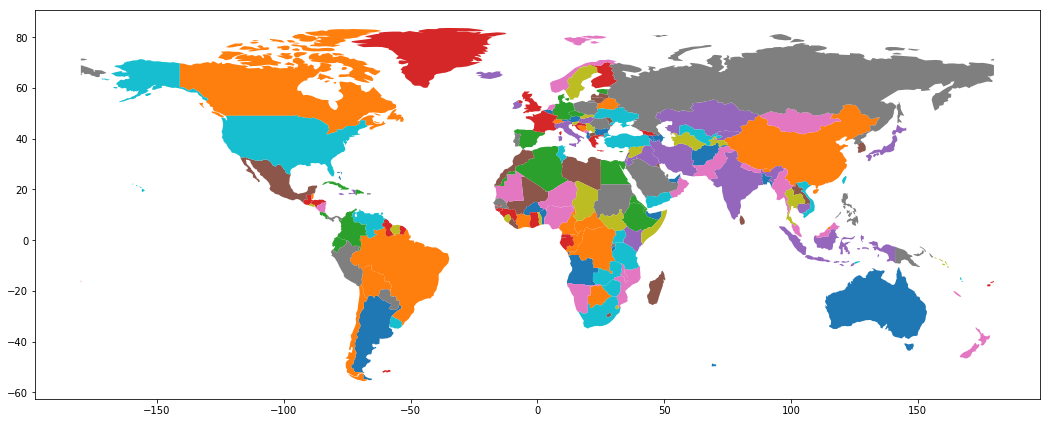

['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Bangladesh', 'Nigeria', 'Russia', 'Japan']


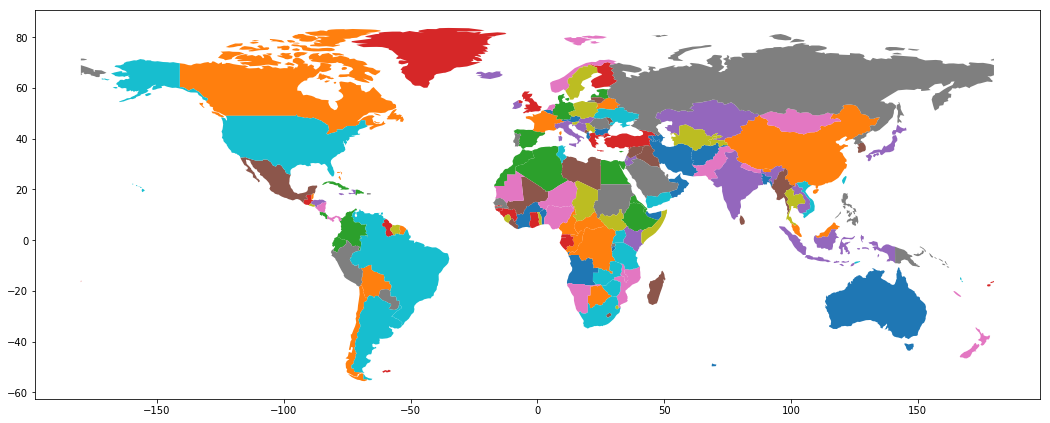

['China', 'India', 'United States', 'Indonesia', 'Venezuela', 'Pakistan', 'Bangladesh', 'Nigeria', 'Russia', 'Japan']


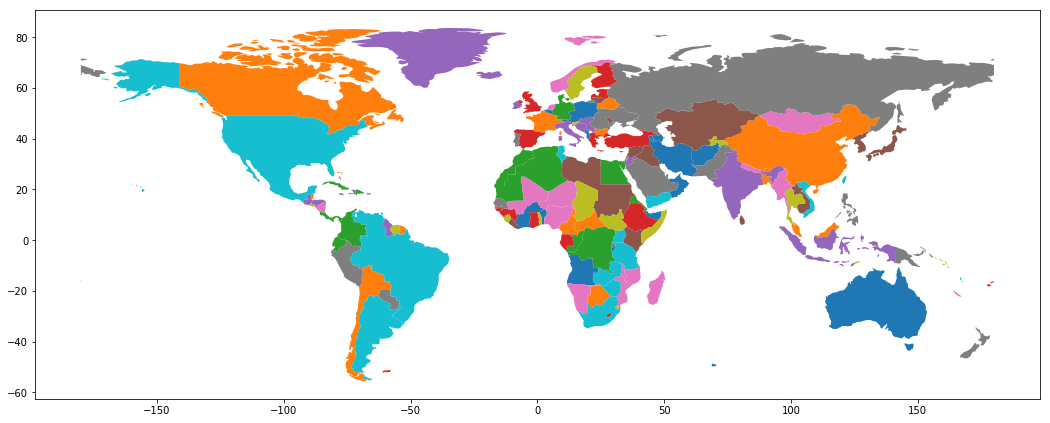

['China', 'India', 'United States', 'Indonesia', 'Venezuela', 'Pakistan', 'Bangladesh', 'Nigeria', 'Russia', 'Japan']


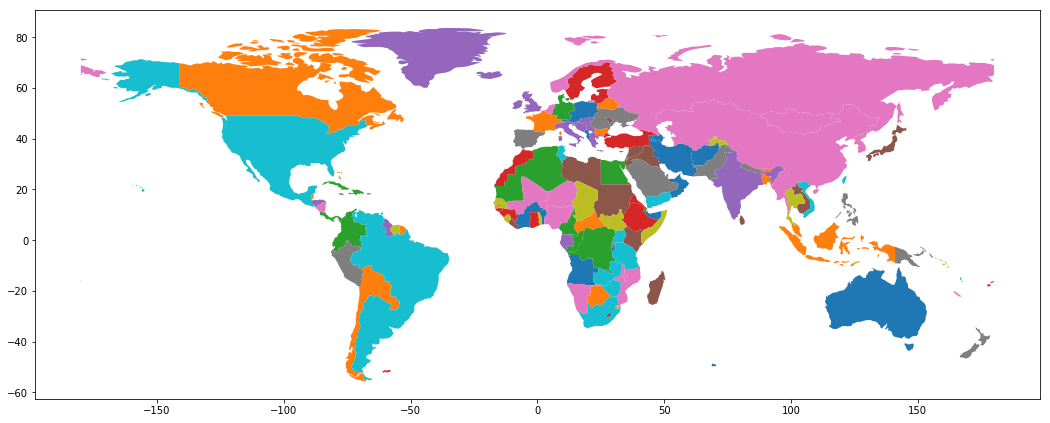

['Myanmar', 'India', 'United States', 'Uruguay', 'Brunei', 'Norway', 'Pakistan', 'Bangladesh', 'Nigeria', 'Japan']


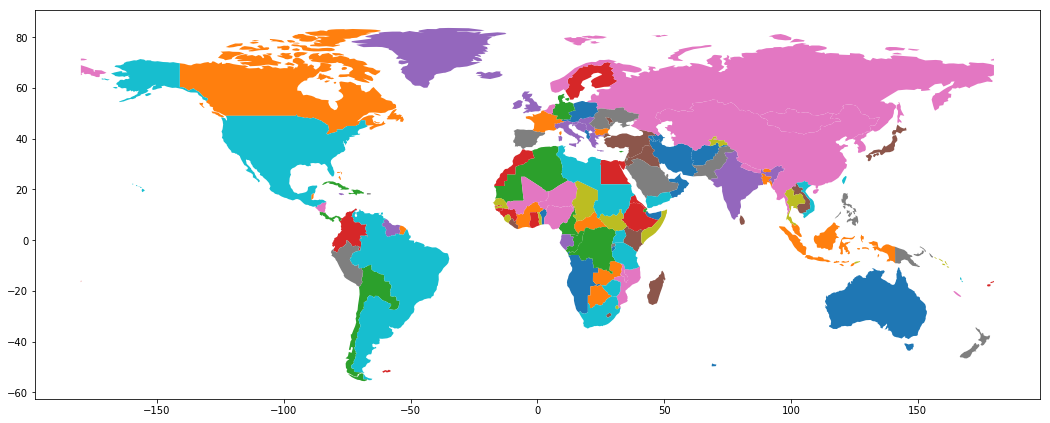

['Myanmar', 'India', 'United States', 'Uruguay', 'Brunei', 'Norway', 'Pakistan', 'Bangladesh', 'Nigeria', 'Japan']


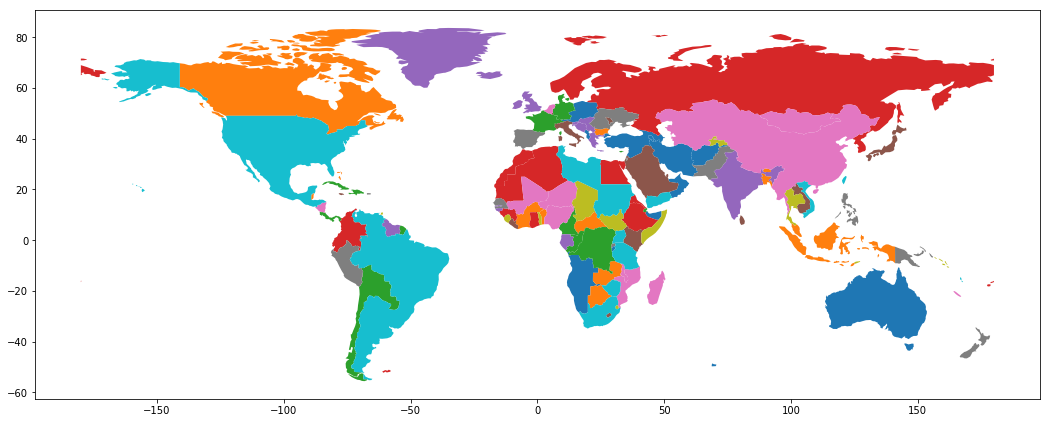

['Myanmar', 'India', 'United States', 'Uruguay', 'Brunei', 'Finland', 'Pakistan', 'Bangladesh', 'Nigeria', 'Japan']


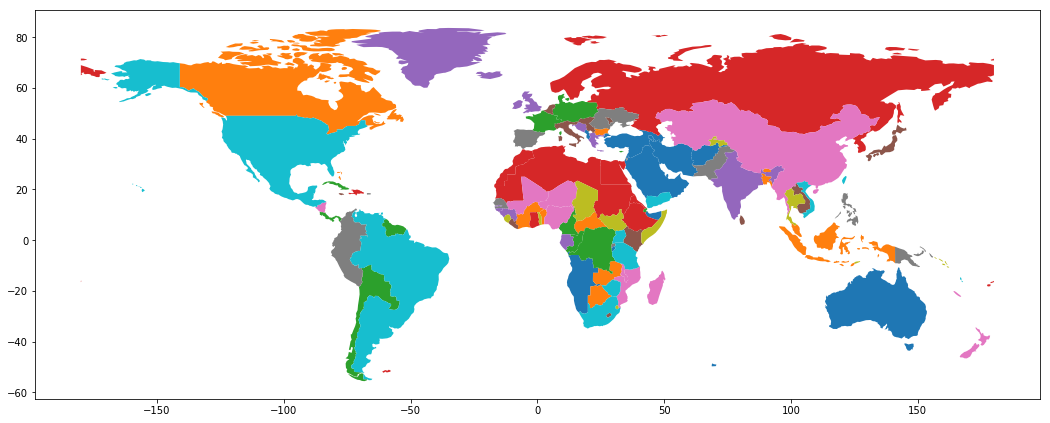

['Myanmar', 'India', 'United States', 'Uruguay', 'Brunei', 'Finland', 'Pakistan', 'Bangladesh', 'Germany', 'Nigeria']


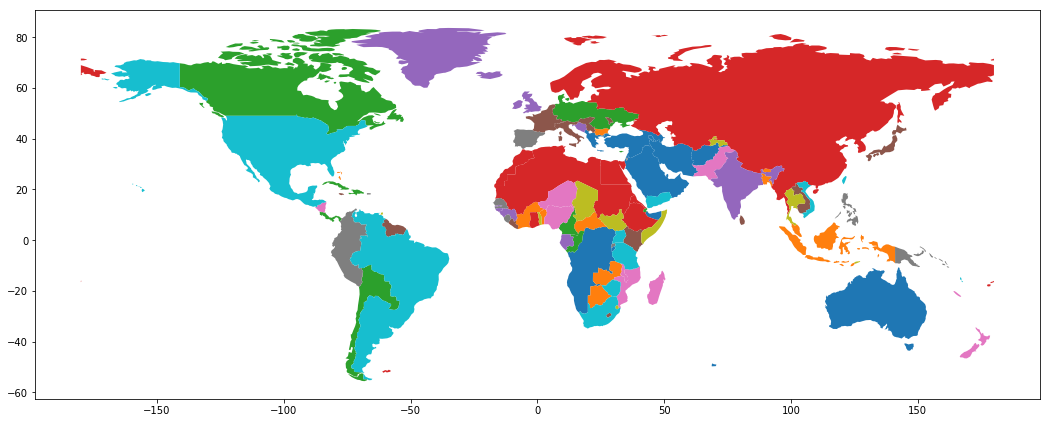

['Finland', 'India', 'United States', 'Uruguay', 'Brunei', 'Germany', 'Pakistan', 'Bangladesh', 'Nigeria', 'Japan']


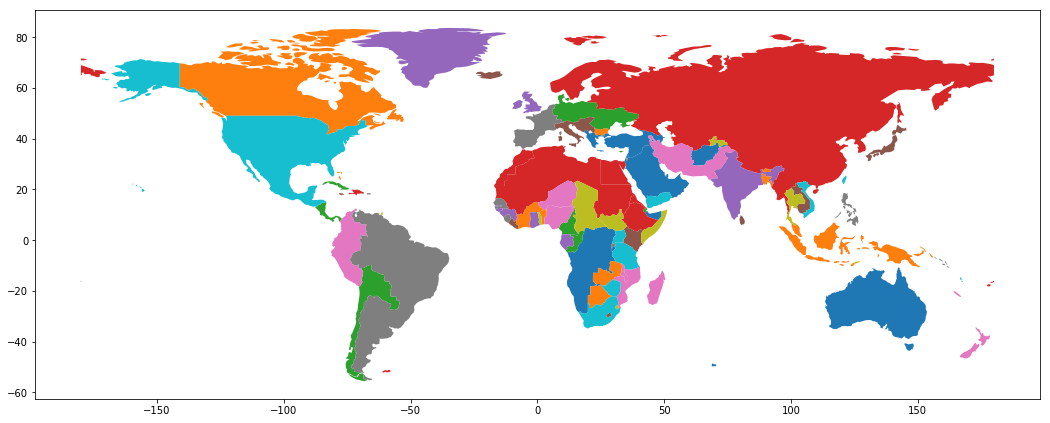

['Finland', 'India', 'United States', 'Portugal', 'Brunei', 'Pakistan', 'Germany', 'Bangladesh', 'Nigeria', 'Japan']


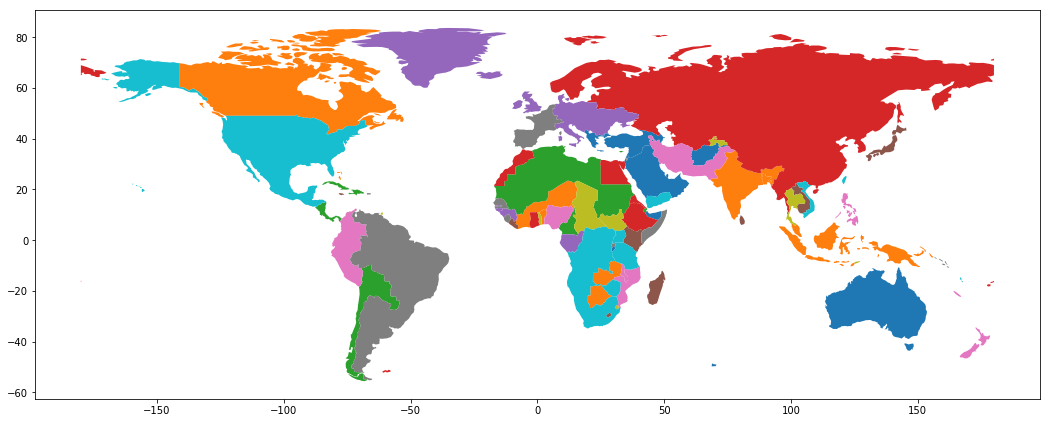

['Finland', 'Bhutan', 'United States', 'Portugal', 'Italy', 'Brunei', 'Pakistan', 'Bangladesh', 'Nigeria', 'South Africa']


In [7]:
for i in range(10):
    game.to_df().plot(figsize=(18,9), column='iso')
    plt.show()
    print ([c.name for c in sorted(game.map.values(), key=lambda x: -x.population)][:10])
    game.turn(verbose=False)

In [8]:
for i in range(10):
    game.turn(verbose=True)

Finland conquered Italy
Tajikistan conquered Afghanistan
United States conquered Costa Rica
Uganda conquered Tanzania
United States conquered Canada
Eq. Guinea conquered Uganda
Portugal conquered Finland
Thailand conquered Brunei
Peru conquered Chile
United States conquered Peru
Portugal conquered Vietnam
Thailand conquered Portugal
Azerbaijan conquered Yemen
Djibouti conquered Somaliland
Bangladesh conquered Bhutan
Nigeria conquered Benin
Pakistan conquered Bangladesh
Swaziland conquered Mozambique
Chad conquered Cameroon
Thailand conquered Pakistan
Timor-Leste conquered Thailand
United States conquered Timor-Leste
Albania conquered Azerbaijan
Somalia conquered Ethiopia
United States conquered Cambodia
Albania conquered United States
Gambia conquered Senegal
